In [93]:
!adb devices && adb forward tcp:9999 tcp:2222

List of devices attached
9885e6423558303254	device



9000


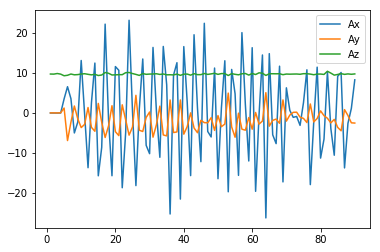

In [110]:
#%%file SenActGrafic.py
#LIBRERIAS
import android
droid = android.Android()
import pandas as pd
import time
%matplotlib inline


#tiempoTotal = 3000

def capturaDatosAceleracion(tiempoTotal):
   # droid.ttsSpeak(str(tiempoTotal))    
    aceleracion = []
    tiempoCensado = 0
    tiempoTotal = tiempoTotal
    
    droid.startSensingTimed(2,100)
    
    while tiempoCensado <= tiempoTotal:
        aceleracion.append(droid.sensorsReadAccelerometer().result)
        time.sleep(100/1000.00)
        tiempoCensado += 100
    droid.stopSensing();
    return pd.DataFrame(aceleracion, columns=["Ax","Ay","Az"]) 
    

    
droid.dialogCreateAlert("Elegir un tiempo")
droid.dialogSetSingleChoiceItems(['3','5','Elije'])
droid.dialogSetPositiveButtonText('Elegir')
droid.dialogShow()
droid.dialogGetResponse()
res = droid.dialogGetSelectedItems()
#print res.result

if(res.result == [0]):
    droid.ttsSpeak('3')
    tiempoTotal = 3000
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()
if(res.result == [1]):
    droid.ttsSpeak('5')
    tiempoTotal = 5000
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()
if(res.result == [2]):
    droid.ttsSpeak('Elije')
    re1 = droid.dialogGetInput("Elije","Ingresa una cantidad en segundos de un numero entero","").result
    re1 = int(re1)
    tiempoTotal = (re1*1000)
    acel = capturaDatosAceleracion(tiempoTotal)
    acel.plot()

print tiempoTotal


In [107]:
!adb push SenActGrafic.py /sdcard/sl4a/scripts/RySI

[100%] /sdcard/sl4a/scripts/RySI/SenActGrafic.py
SenActGrafic.py: 1 file pushed. 0.1 MB/s (1445 bytes in 0.019s)
